In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
book = pd.read_csv('book_data.csv')

## Inflation

In [63]:
book.head()

,Unnamed: 0,titles,authors,stars,reviews,cover,prices,publishers,genres,year
0,0,How to Set Up and Maintain a World Wide Web Si...,Lincoln D. Stein,1.0,1.0,Paperback,44.59,"Addison-Wesley Professional (August 9, 1995)",Textbooks,1995
1,1,A Mathematician Reads The Newspaper,John Allen Paulos,4.1,45.0,Hardcover,19.58,"Basic Books; New edition edition (April 6, 1995)",Literature & Fiction,1995
2,2,Brightness Reef (Bantam Spectra Book),David Brin,3.9,100.0,Hardcover,14.99,"Spectra; First Edition edition (September 1, 1...",Science Fiction & Fantasy,1995
3,3,Silicon Snake Oil: Second Thoughts on the Info...,Clifford Stoll,3.1,60.0,Hardcover,12.50,"Doubleday; 1st edition (March 1, 1995)",Science & Math,1995
4,4,The Dark and Deadly Pool (Laurel-Leaf Suspense...,Joan Lowery Nixon,3.8,33.0,Mass Market Paperback,0.10,"Laurel Leaf; Reprint edition (May 1, 1989)",Teens,1995


In [64]:
inflation = 2.95 #avg inflation rate for usa

In [65]:
rates = {y:(2018 - y)*inflation for y in range(1995,2018)}

In [66]:
for y in range(1995,2018):
    cond = book.year == y
    book.iloc[(book[cond].index[0:-1]),6] = book[cond].prices + book[cond].prices * rates[y] / 100

In [67]:
book.head()

,Unnamed: 0,titles,authors,stars,reviews,cover,prices,publishers,genres,year
0,0,How to Set Up and Maintain a World Wide Web Si...,Lincoln D. Stein,1.0,1.0,Paperback,74.844315,"Addison-Wesley Professional (August 9, 1995)",Textbooks,1995
1,1,A Mathematician Reads The Newspaper,John Allen Paulos,4.1,45.0,Hardcover,32.865030,"Basic Books; New edition edition (April 6, 1995)",Literature & Fiction,1995
2,2,Brightness Reef (Bantam Spectra Book),David Brin,3.9,100.0,Hardcover,25.160715,"Spectra; First Edition edition (September 1, 1...",Science Fiction & Fantasy,1995
3,3,Silicon Snake Oil: Second Thoughts on the Info...,Clifford Stoll,3.1,60.0,Hardcover,20.981250,"Doubleday; 1st edition (March 1, 1995)",Science & Math,1995
4,4,The Dark and Deadly Pool (Laurel-Leaf Suspense...,Joan Lowery Nixon,3.8,33.0,Mass Market Paperback,0.167850,"Laurel Leaf; Reprint edition (May 1, 1989)",Teens,1995


## Mean prices by year

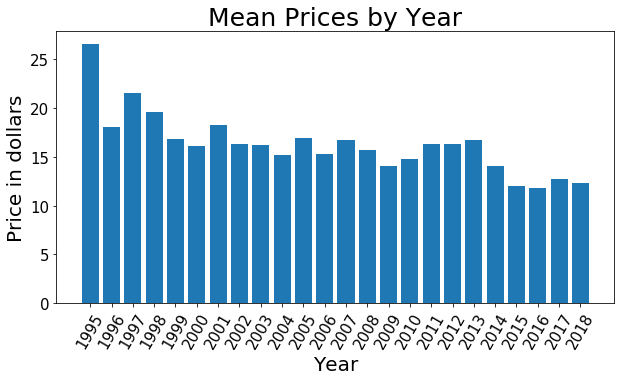

<Figure size 432x288 with 0 Axes>

In [86]:
mean_price = [np.mean(book[book.year == y].prices) for y in range(1995,2019)]
year = [y for y in range(1995,2019)]
plt.figure(figsize=(10,5))
plt.bar(year, mean_price)
plt.title("Mean Prices by Year", size=25)
plt.xlabel("Year", size=20)
plt.xticks(year, rotation=60, size=15)
plt.ylabel("Price in dollars", size=20)
plt.yticks(size=15)
plt.show()
plt.savefig('mean.jpeg')